In [1]:
%matplotlib inline
from core import *

samples = analysis_set["main"] 

read_stats = {}
for sample in samples:
    name2qscores, name2lengths = get_summaries(summary_files[sample])
    read_stats[sample]= get_sample_stats(sample, refs[sample], name2qscores, name2lengths)

    print(sample, np.median(read_stats[sample]["acc"]), np.median(read_stats[sample]["metrics"], axis = 0))

In [2]:
# guppy alone
for sample in analysis_set["main"]:
    acc = np.median(read_stats[sample]["acc"])
    n_reads = read_stats[sample]["metrics"].shape[0]
    mis, ins, delete = np.median(read_stats[sample]["metrics"], axis = 0)
    qscore = np.median(read_stats[sample]["qscores"][:, 0])
    length = np.median(read_stats[sample]["aligned_read_length"])
    print("%s & %d & %.1f & %d & %.3f & %.3f & %.3f & %.3f & \\\\ [3ex] \\hline" % (sample.replace("_IVT", " (IVT)"), n_reads, qscore, length, acc, mis, ins, delete))

Human & 1483755 & 10.2 & 876 & 0.901 & 0.027 & 0.026 & 0.045 & \\ [3ex] \hline
Human (IVT) & 2015950 & 10.7 & 486 & 0.916 & 0.022 & 0.022 & 0.039 & \\ [3ex] \hline
Mouse & 181977 & 9.6 & 616 & 0.878 & 0.036 & 0.025 & 0.059 & \\ [3ex] \hline
Zebrafish & 553604 & 9.6 & 839 & 0.867 & 0.037 & 0.020 & 0.073 & \\ [3ex] \hline
C. elegans & 227372 & 11.0 & 688 & 0.915 & 0.020 & 0.019 & 0.044 & \\ [3ex] \hline
Arabidopsis & 1010943 & 10.7 & 878 & 0.911 & 0.022 & 0.021 & 0.045 & \\ [3ex] \hline
H. volcanii & 22315 & 9.9 & 505 & 0.905 & 0.028 & 0.022 & 0.043 & \\ [3ex] \hline
E. coli & 198448 & 9.3 & 662 & 0.876 & 0.040 & 0.032 & 0.049 & \\ [3ex] \hline
shortRNAs (IVT) & 45028 & 8.5 & 160 & 0.899 & 0.026 & 0.019 & 0.051 & \\ [3ex] \hline
Yeast & 324889 & 9.4 & 314 & 0.898 & 0.024 & 0.024 & 0.050 & \\ [3ex] \hline
SARS2 & 575673 & 11.0 & 2078 & 0.914 & 0.022 & 0.020 & 0.044 & \\ [3ex] \hline
SARS2 (IVT) & 2316635 & 10.5 & 1572 & 0.908 & 0.024 & 0.023 & 0.044 & \\ [3ex] \hline


In [3]:
colors = list(sns.color_palette(palette=None, n_colors=10, desat=None, as_cmap=False))
colors.append( (1.0, 0.8509803921568627, 0.1843137254901961))
colors.append((0.6509803921568628, 0.8470588235294118, 0.32941176470588235))
sns.color_palette(palette=colors)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [4]:
for sample in analysis_set['main']:
    index = np.where(np.sum(read_stats[sample]["metrics"], axis =1) > 0.3)
    read_stats[sample]["metrics_filtered"] = np.delete(read_stats[sample]["metrics"], index, axis = 0)
    # read_stats[sample]["qscores_filtered"] = np.delete(read_stats[sample]["qscores"], index, axis = 0)
    print(sample, read_stats[sample]["metrics_filtered"].shape, read_stats[sample]["metrics"].shape)
    print(np.where(np.sum(read_stats[sample]["metrics_filtered"], axis =1) > 0.3))

Human (1477796, 3) (1483755, 3)
(array([], dtype=int64),)
Human_IVT (2013859, 3) (2015950, 3)
(array([], dtype=int64),)
Mouse (181659, 3) (181977, 3)
(array([], dtype=int64),)
Zebrafish (551674, 3) (553604, 3)
(array([], dtype=int64),)
C. elegans (226700, 3) (227372, 3)
(array([], dtype=int64),)
Arabidopsis (1007568, 3) (1010943, 3)
(array([], dtype=int64),)
H. volcanii (22298, 3) (22315, 3)
(array([], dtype=int64),)
E. coli (198008, 3) (198448, 3)
(array([], dtype=int64),)
shortRNAs_IVT (44998, 3) (45028, 3)
(array([], dtype=int64),)
Yeast (323972, 3) (324889, 3)
(array([], dtype=int64),)
SARS2 (573635, 3) (575673, 3)
(array([], dtype=int64),)
SARS2_IVT (2301945, 3) (2316635, 3)
(array([], dtype=int64),)


In [5]:
x, y, hue = [], [], []
metric_label = ["Mismatch", "Insertion", "Deletion"]

for sample in analysis_set["main"]:
    print(sample, read_stats[sample]["metrics_filtered"].shape[0])
    dim = read_stats[sample]["metrics_filtered"].shape[0]*3
    x1, y1 = np.empty(dim, dtype = "<U32"), np.empty(dim, dtype = np.float64)
    hue1 = np.empty(dim, dtype = "U15")
    l, step = 0, read_stats[sample]["metrics_filtered"].shape[0]
    for col in range(3):
        x1[l : (col+1) * step] = metric_label[col]
        l = (col+1) * step
    y1 = read_stats[sample]["metrics_filtered"].flatten(order="F")
    if "IVT" in sample:
        sample = sample.split("_IVT")[0] + " (IVT)"
    hue1[:] = sample

    x = np.concatenate([x, x1])
    hue = np.concatenate([hue, hue1])
    y = np.concatenate([y, y1])

Human 1477796
Human_IVT 2013859
Mouse 181659
Zebrafish 551674
C. elegans 226700
Arabidopsis 1007568
H. volcanii 22298
E. coli 198008
shortRNAs_IVT 44998
Yeast 323972
SARS2 573635
SARS2_IVT 2301945


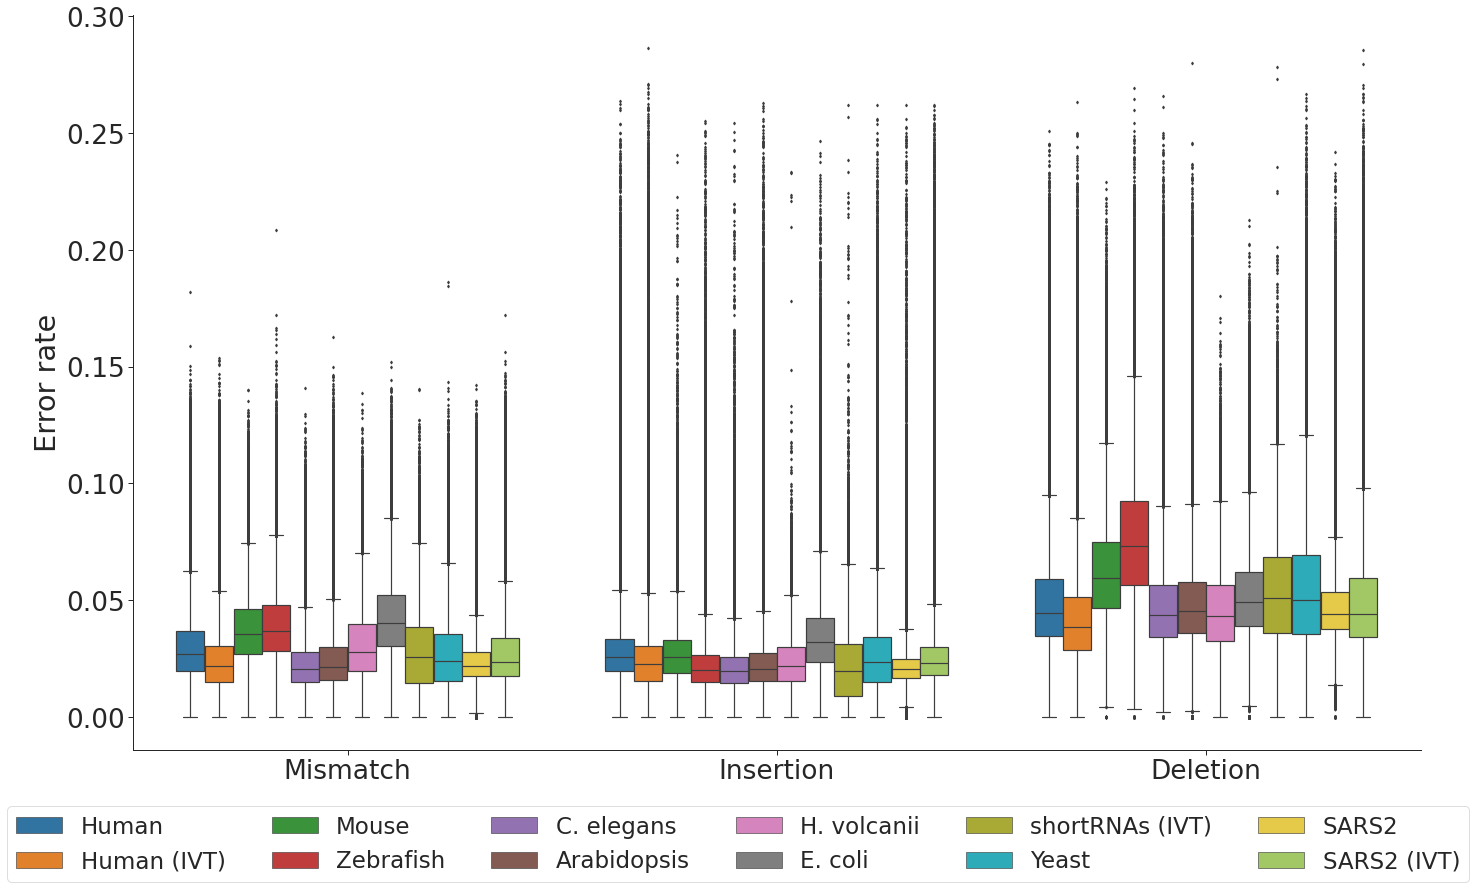

In [7]:
sns.set(rc = {'figure.figsize': (22, 13)})   
sns.set_context("paper", font_scale = 3)
sns.set_style("ticks")
sns.boxplot(x = x, y = y, hue = hue, palette = colors, fliersize = 2)
sns.despine()
plt.legend(fontsize = 23, loc = 'upper center', bbox_to_anchor = (0.47, -0.06), fancybox = True, ncol = 6)
plt.ylabel("Error rate")
plt.tight_layout()
plt.savefig("images/metrics/metrics", bbox_inches = "tight")
plt.show()

Human


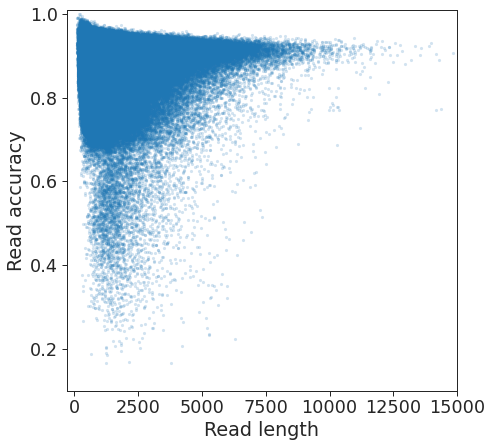

In [9]:
sns.set(rc = {'figure.figsize': (7, 7)})   
sns.set_context("paper", font_scale = 2)
sns.set_style("ticks")
for sample in samples:
    print(sample)
    sns.scatterplot(x = read_stats[sample]["original_read_length"], y = read_stats[sample]["acc"],
                    s = 10, alpha = 0.2, linewidth = 0, color = "tab:blue")# kind = "kde", fill=True)
    plt.xlabel("Read length"), plt.ylabel("Read accuracy")
    plt.ylim(0.1, 1.01), plt.xlim(-300, 15000)
    # plt.savefig("images/fig1/length2acc", bbox_inches = "tight")
    plt.show()

198937 198937


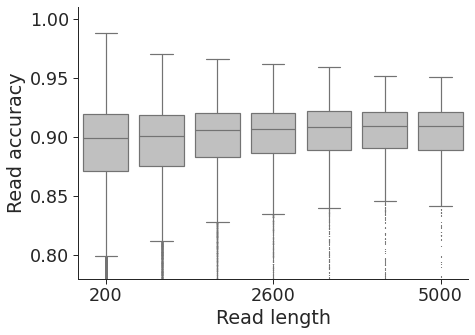

In [13]:
import matplotlib.ticker as ticker

sns.set(rc = {'figure.figsize': (7, 7)})   
sns.set_context("paper", font_scale = 2)
sns.set_style("ticks")

l, step = 200, 800
x, y, hue = [], [], []
sample = "Human"
for i in range(l, 8000, step):
    indexes = np.where((read_stats[sample]["original_read_length"] > i) & 
                       (read_stats[sample]["original_read_length"] < i+step))[0] #& (read_stats[sample]["acc"] > 0.7))[0]
    if len(indexes) > 500:
        x = x + [i] * len(indexes)
        y = y + list(read_stats[sample]["acc"][indexes])
        hue = hue + [sample] * len(indexes)

print(len(x), len(y))
ax = sns.boxplot(x=x, y=y, color = "silver", fliersize=0.3)
sns.despine()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
# sns.lineplot(x=np.arange((8000-l)/step), y = means)
# plt.xticks(rotation = 50)
plt.xlabel("Read length"), plt.ylabel("Read accuracy")
plt.ylim(0.78, 1.01)
# plt.savefig("images/fig1/length2acc_box", bbox_inches = "tight")
plt.show()